In [1]:
#Start with importing all dependencies

import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('Seaborn verion', sns.__version__)
sns.set_style('whitegrid')

# text data
import string
import re

import os
print(os.listdir("C:/Users/ams-duongn.EXPEDITORS/Desktop/learn/Data Science Master/Week 5"))

# Any results we write to the current directory are saved as output.

Seaborn verion 0.11.1
['.ipynb_checkpoints', 'bestsellers with categories.csv', 'Class Inheritance.ipynb', 'Code.py', 'Data Modelling Amazon Bestsellers.ipynb', 'Data Modelling Amazon Bestsellers.pptx', 'Draft defence.pptx', 'Module 2  Reflection.docx', '~$dule 2  Reflection.docx']


In [2]:
##Uploading the dataset and summarizing
bestSellers = pd.read_csv("C:/Users/ams-duongn.EXPEDITORS/Desktop/learn/Data Science Master/Week 5/bestsellers with categories.csv")

In [3]:
##the head() function shows the first few rows of the dataset
bestSellers.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [4]:
# Basic information about the types of the columns
bestSellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [5]:
# Baic statistical measurements of the numeric features. The Year column just represent the year when the associated book is classified as bestseller, hence it is not interpretable

bestSellers.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [6]:
bestSellers.isnull().sum().sum() # Counts missings across the whole data set

0

In [7]:
# Data preparation: rename User Rating as user_rating, and then we will fix some spellings in the data
bestSellers.rename(columns={"User Rating": "User_Rating"}, inplace=True)
bestSellers[bestSellers.Author == 'J. K. Rowling']
bestSellers[bestSellers.Author == 'J.K. Rowling']
bestSellers.loc[bestSellers.Author == 'J. K. Rowling', 'Author'] = 'J.K. Rowling'
bestSellers['name_len'] = bestSellers['Name'].apply(lambda x: len(x) - x.count(" ")) # subtract whitespaces
punctuations = string.punctuation
print('list of punctuations : ', punctuations)

# percentage of punctuations
def count_punc(text):
    """This function counts the number of punctuations in a text"""
    count = sum(1 for char in text if char in punctuations)
    return round(count/(len(text) - text.count(" "))*100, 3)

# apply function
bestSellers['punc%'] = bestSellers['Name'].apply(lambda x: count_punc(x))

list of punctuations :  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


c:\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


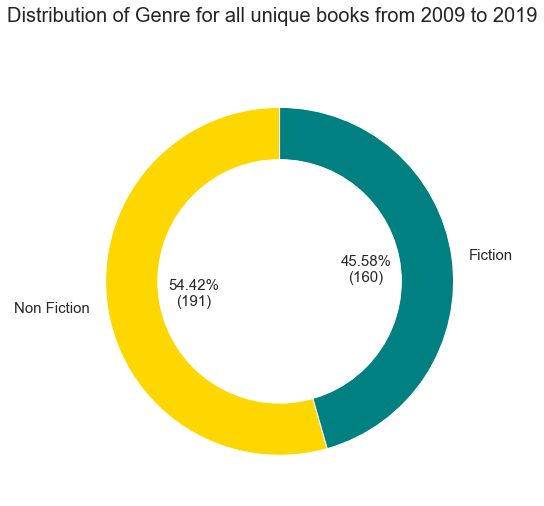

In [8]:
#In the data set, Genre column contains two categorical variables: Fiction and Non-Fiction. Let’s visualize the data according to the genre:
no_dup = bestSellers.drop_duplicates('Name')
g_count = no_dup['Genre'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

genre_col = ['gold','teal']

center_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(x=g_count.values, labels=g_count.index, autopct=make_autopct(g_count.values), 
          startangle=90, textprops={'size': 15}, pctdistance=0.5, colors=genre_col)
ax.add_artist(center_circle)

fig.suptitle('Distribution of Genre for all unique books from 2009 to 2019', fontsize=20)
fig.show()

In [9]:
#According to the diagram, Non-Fiction was a more popular category than Fiction, each year from 2009 to 2019. Of the 351 unique books, 54.4% were non-fiction and 45.6% were fiction.

In [10]:
#Now let’s visualize the above insights according to each year:

c:\programs\python\python37\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


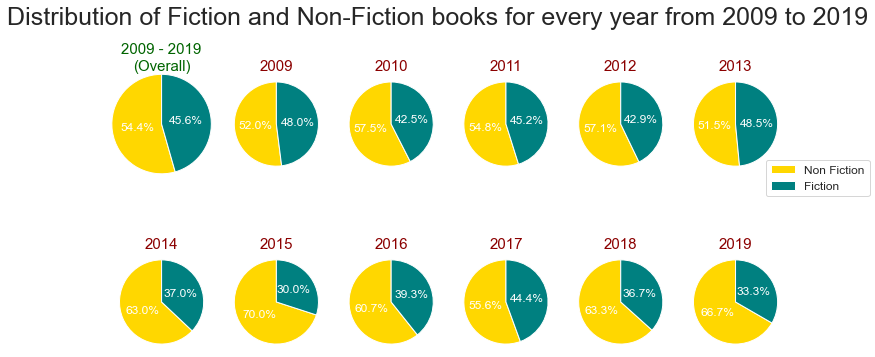

In [11]:
y1 = np.arange(2009, 2014)
y2 = np.arange(2014, 2020)
g_count = no_dup['Genre'].value_counts()

fig, ax = plt.subplots(2, 6, figsize=(12,6))

ax[0,0].pie(x=g_count.values, labels=None, autopct='%1.1f%%',
            startangle=90, textprops={'size': 12, 'color': 'white'},
            pctdistance=0.5, radius=1.3, colors=genre_col)
ax[0,0].set_title('2009 - 2019\n(Overall)', color='darkgreen', fontdict={'fontsize': 15})

for i, year in enumerate(y1):
    counts = no_dup[no_dup['Year'] == year]['Genre'].value_counts()
    ax[0,i+1].set_title(year, color='darkred', fontdict={'fontsize': 15})
    ax[0,i+1].pie(x=counts.values, labels=None, autopct='%1.1f%%', 
                  startangle=90, textprops={'size': 12,'color': 'white'}, 
                  pctdistance=0.5, colors=genre_col, radius=1.1)

for i, year in enumerate(y2):
    counts = no_dup[no_dup['Year'] == year]['Genre'].value_counts()
    ax[1,i].pie(x=counts.values, labels=None, autopct='%1.1f%%', 
                startangle=90, textprops={'size': 12,'color': 'white'},
                pctdistance=0.5, colors=genre_col, radius=1.1)
    ax[1,i].set_title(year, color='darkred', fontdict={'fontsize': 15})

plt.suptitle('Distribution of Fiction and Non-Fiction books for every year from 2009 to 2019',
             fontsize=25)
fig.legend(g_count.index, loc='center right', fontsize=12)
fig.show()

In [12]:
#The highest fraction (70%) of non-fiction books were sold in 2015 and the lowest for fiction books (30%). For fiction books, the highest fraction (48.5%) of books were sold in 2013. From the numbers, we can see that among the bestselling books, the division between these two genres fluctuates over year without any clear trend.
#However, we can clearly see that the Non-Fiction books over the last 10 years always account for more than half of the bestselling books titles

In [13]:
#The bestselling authors are selected based on their appearances in the top 50 bestselling books each year, from 2009 to 2019. Now let’s look at the top 10 bestselling authors of both fiction and non-fiction categories:

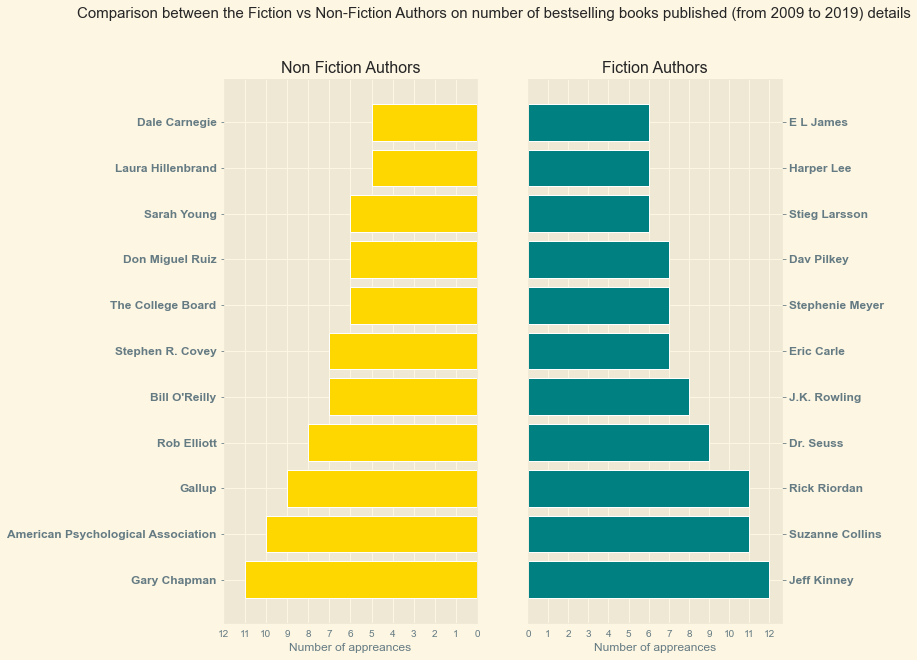

In [14]:
best_nf_authors = bestSellers.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Non Fiction'].sort_values(ascending=False)[:11]
best_f_authors = bestSellers.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Fiction'].sort_values(ascending=False)[:11]

with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(1, 2, figsize=(10,10))
    
    ax[0].barh(y=best_nf_authors.index, width=best_nf_authors.values,
           color=genre_col[0])
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_left()
    ax[0].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[0].set_yticklabels(best_nf_authors.index, fontsize=12, fontweight='semibold')
    ax[0].set_xlabel('Number of appreances')
    ax[0].set_title('Non Fiction Authors')
    
    ax[1].barh(y=best_f_authors.index, width=best_f_authors.values,
           color=genre_col[1])
    ax[1].yaxis.tick_right()
    ax[1].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[1].set_yticklabels(best_f_authors.index, fontsize=12, fontweight='semibold')
    ax[1].set_title('Fiction Authors')
    ax[1].set_xlabel('Number of appreances')
    

plt.suptitle('Comparison between the Fiction vs Non-Fiction Authors on number of bestselling books published (from 2009 to 2019) details', fontsize=15)    
plt.show()

In [15]:
#Top-selling authors are selected based on their appearances in the top 50 best-selling books each year. The number of appearances includes duplicate book names. Their unique posts and overall reviews are featured below:

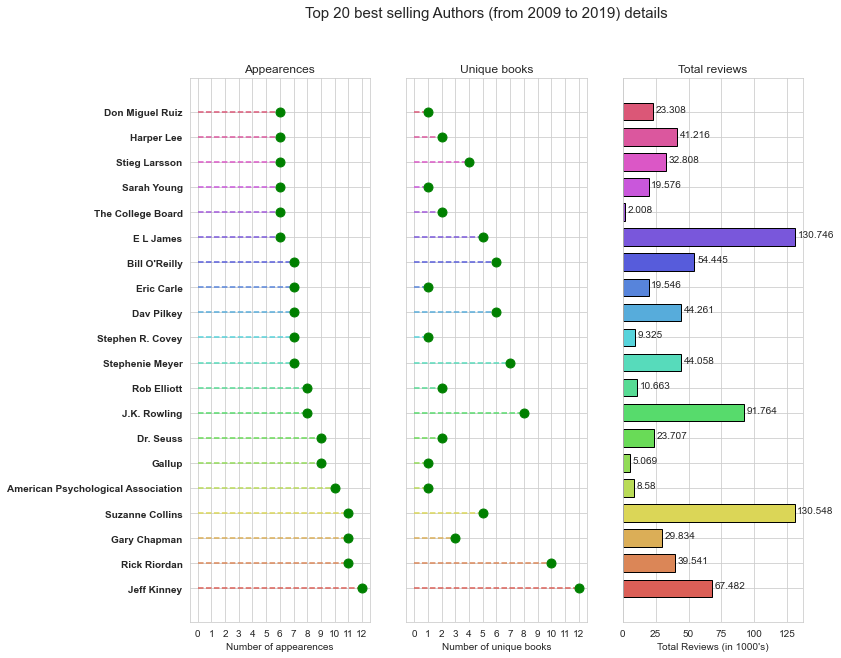

In [16]:
n_best = 20

top_authors = bestSellers.Author.value_counts().nlargest(n_best)
no_dup = bestSellers.drop_duplicates('Name') # removes all rows with duplicate book names

fig, ax = plt.subplots(1, 3, figsize=(11,10), sharey=True)

color = sns.color_palette("hls", n_best)

ax[0].hlines(y=top_authors.index , xmin=0, xmax=top_authors.values, color=color, linestyles='dashed')
ax[0].plot(top_authors.values, top_authors.index, 'go', markersize=9)
ax[0].set_xlabel('Number of appearences')
ax[0].set_xticks(np.arange(top_authors.values.max()+1))
ax[0].set_yticklabels(top_authors.index, fontweight='semibold')
ax[0].set_title('Appearences')

book_count = []
total_reviews = []
for name, col in zip(top_authors.index, color):
    book_count.append(len(no_dup[no_dup.Author == name]['Name']))
    total_reviews.append(no_dup[no_dup.Author == name]['Reviews'].sum()/1000)
ax[1].hlines(y=top_authors.index , xmin=0, xmax=book_count, color=color, linestyles='dashed')
ax[1].plot(book_count, top_authors.index, 'go', markersize=9)
ax[1].set_xlabel('Number of unique books')
ax[1].set_xticks(np.arange(max(book_count)+1))
ax[1].set_title('Unique books')

ax[2].barh(y=top_authors.index, width=total_reviews, color=color, edgecolor='black', height=0.7)
for name, val in zip(top_authors.index, total_reviews):
    ax[2].text(val+2, name, val)
ax[2].set_xlabel("Total Reviews (in 1000's)")
ax[2].set_title('Total reviews')

plt.suptitle('Top 20 best selling Authors (from 2009 to 2019) details', fontsize=15)
plt.show()

In [17]:
#Author Jeff Kinney is the best-selling author with 12 appearances in best-selling books from 2009 to 2019. This is how we can analyze any data related to sales consisting of different categories.

In [18]:
#I would like to see the books that are on bestselling list for multiple years
df = pd.concat(g for _, g in bestSellers.groupby("Name") if len(g) > 1)
df

,Name,Author,User_Rating,Reviews,Price,Year,Genre,name_len,punc%
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction,20,5.000
10,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction,20,5.000
20,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2014,Fiction,22,0.000
21,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2015,Fiction,22,0.000
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction,8,0.000
...,...,...,...,...,...,...,...,...,...
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction,6,0.000
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction,71,1.408
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction,71,1.408
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction,71,1.408


In [19]:
#Adding the count of number of years a book on this list
df = df.drop(columns=['name_len','punc%','Year'])
df = df.groupby(df.columns.tolist()).size().reset_index().rename(columns={0:'Records'})
df

,Name,Author,User_Rating,Reviews,Price,Genre,Records
0,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,Fiction,2
1,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,Fiction,2
2,Becoming,Michelle Obama,4.8,61133,11,Non Fiction,2
3,Between the World and Me,Ta-Nehisi Coates,4.7,10070,13,Non Fiction,2
4,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,Fiction,2
...,...,...,...,...,...,...,...
101,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,13,Non Fiction,1
102,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,Non Fiction,4
103,"Wheat Belly: Lose the Wheat, Lose the Weight, ...",William Davis,4.4,7497,6,Non Fiction,2
104,Wonder,R. J. Palacio,4.8,21625,9,Fiction,5


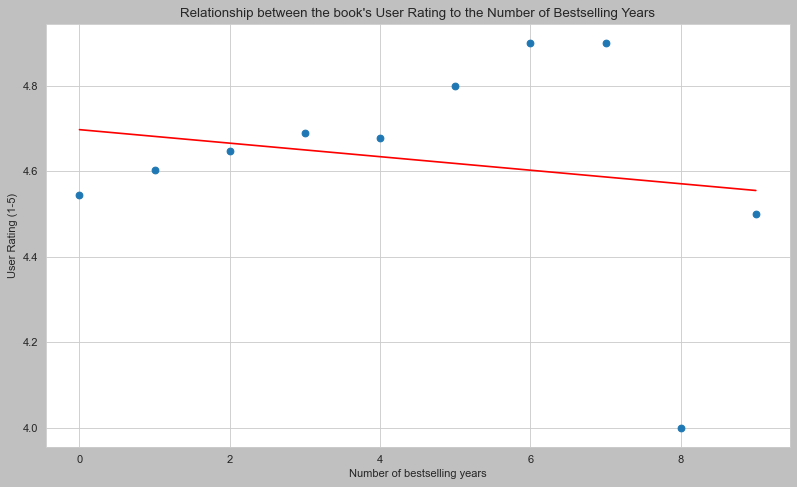

In [20]:
#Based on the hypothesis that the higher the book's user_rating, the longer that particular book stays on the bestselling list.
#By that I want to draw a scatterplot between these two variables and a simple regression line

user_rating = df.groupby("Records").User_Rating.mean()

##finding equation line of best fit
lm_original = np.polyfit(range(0,10), user_rating, 1)

# calculate the y values based on the co-efficients from the model
r_x, r_y = zip(*((i, i*lm_original[0] + lm_original[1]) for i in range(0,10)))


##choosing graph size and color
plt.figure(figsize=(12, 7), dpi= 80, facecolor='silver', edgecolor='chocolate')

##creating scatter plot
plt.scatter(range(0, 10), user_rating)
plt.plot(r_x, r_y, color = "Red")

plt.xlabel('Number of bestselling years')
plt.ylabel('User Rating (1-5)')
plt.title("Relationship between the book's User Rating to the Number of Bestselling Years")

plt.show()

In [21]:
#With the above graph, the scatter plots shows a quite different story than the regression line, due to the 2 strong outliers on books which were on the list for 9 and 10 years.
#In general, we can say that there is evidence from the plot to support the hypothesis if we disregard the abnormality of the outliers.

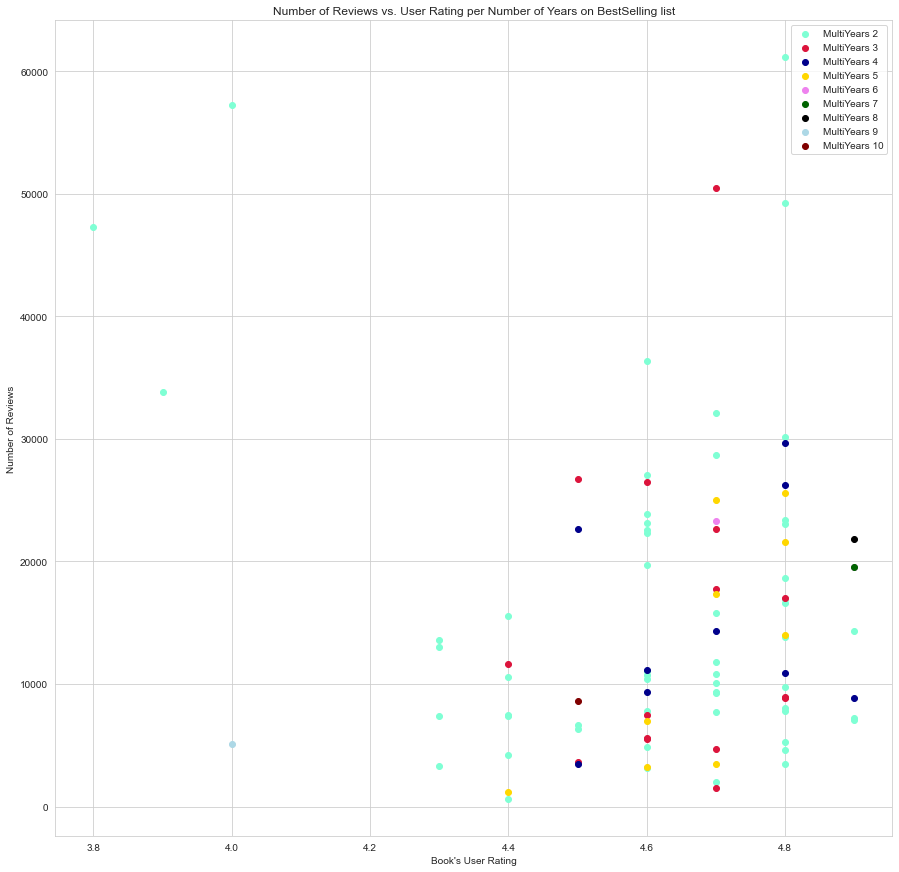

In [22]:
#Based on the hypothesis that the more reviews a book received, its own user-rating might drops since there are more negative reviews.
#By that I want to draw a scatterplot between these two variables and a simple regression line

# Create the same scatter plot between magnesium and alcohol but color by the target
plt.figure(figsize=(15,15))
plt.scatter(df.User_Rating[df.Records==2],df.Reviews[df.Records==2], color='aquamarine', label='MultiYears 2')
plt.scatter(df.User_Rating[df.Records==3],df.Reviews[df.Records==3], color='crimson', label='MultiYears 3')
plt.scatter(df.User_Rating[df.Records==4],df.Reviews[df.Records==4], color='darkblue', label='MultiYears 4')
plt.scatter(df.User_Rating[df.Records==5],df.Reviews[df.Records==5], color='gold', label='MultiYears 5')
plt.scatter(df.User_Rating[df.Records==6],df.Reviews[df.Records==6], color='violet', label='MultiYears 6')
plt.scatter(df.User_Rating[df.Records==7],df.Reviews[df.Records==7], color='darkgreen', label='MultiYears 7')
plt.scatter(df.User_Rating[df.Records==8],df.Reviews[df.Records==8], color='black', label='MultiYears 8')
plt.scatter(df.User_Rating[df.Records==9],df.Reviews[df.Records==9], color='lightblue', label='MultiYears 9')
plt.scatter(df.User_Rating[df.Records==10],df.Reviews[df.Records==10], color='maroon', label='MultiYears 10')
plt.ylabel('Number of Reviews')
plt.xlabel("Book's User Rating")
plt.title('Number of Reviews vs. User Rating per Number of Years on BestSelling list')
plt.legend()
plt.show()

In [23]:
#With the above chart, it is apparent that user rating value of the books determines more on how successful it is on the market (simply based on how many bestselling years) with all above the 4.3 points.
#The number of reviews doesnt make a clear cut hear since many books with the tops number of reviews but only stays on this list for 2 or 3 years; whereaas most successful books stay between the range of 5-20000 reviews.
#There seems to be also no general rules if the achievement on the combination of both of these measures will predict the book to be successful